In [53]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import numpy as np
import statsmodels.api as sm

plt.rc('font', family='Malgun Gothic')

In [22]:
data = pd.read_excel('C:/Users/Innovation/Desktop/김동요/jupyter/Data/MA/챕터별 예제 파일/Chapter 9 Excel Files/Maospalace.xlsx')

In [23]:
data.head()

,예상 식사 판매량,오차,식사 가격,식사 판매량,탄산음료,맥주
0,420.6365,-29.6365,9.3,391,313,90
1,426.5555,-8.5555,9.1,418,326,100
2,444.3125,14.6875,8.5,459,358,115
3,414.7175,9.2825,9.5,424,331,81
4,438.3935,8.6065,8.7,447,380,89


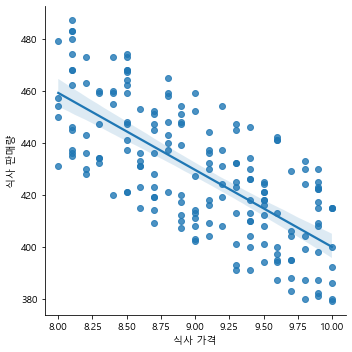

In [26]:
sns.lmplot(x='식사 가격', y="식사 판매량", data=data)
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()

model.fit(data['식사 가격'].values.reshape(-1, 1), data['식사 판매량'].values.reshape(-1, 1))

LinearRegression()

In [39]:
r2_score(data['식사 판매량'].values.reshape(-1, 1), model.predict(data['식사 가격'].values.reshape(-1, 1)))

0.5067476213563272

In [32]:
model.coef_

array([[-29.594544]])

In [33]:
model.intercept_

array([695.87414329])

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(data[['식사 가격', '탄산음료', '맥주']], data['식사 판매량'].values.reshape(-1, 1))

LinearRegression()

In [35]:
model.coef_

array([[-13.98369182,   0.59623368,   0.21275197]])

In [36]:
model.intercept_

array([333.47353487])

<AxesSubplot:>

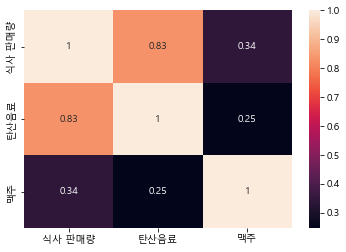

In [42]:
sns.heatmap(data[['식사 판매량', '탄산음료', '맥주']].corr(), annot=True)

In [51]:
data = pd.read_excel('C:/Users/Innovation/Desktop/김동요/jupyter/Data/MA/챕터별 예제 파일/Chapter 10 Excel Files/Europe.xlsx', sheet_name='data')

In [52]:
data.head()

,국가,인구,\n컴퓨터 매출액,매출액/인구,인당 GNP,실업률,교육비에 사용하는 GNP 비율
0,Austria,8.4,941.2,112.047619,49600,4.2,5.8
1,Belgium,10.5,1681.9,160.180952,47090,8.1,5.9
2,Bulgaria,7.6,154.0,20.263158,6550,13.5,3.5
3,Czech Rep.,10.2,1028.7,100.852941,20670,6.6,4.4
4,Denmark,5.5,935.4,170.072727,62120,5.2,8.4


In [68]:
x = data[['인당 GNP', '실업률', '교육비에 사용하는 GNP 비율']]
x = sm.add_constant(x, has_constant='add')
y = data['매출액/인구']
model = sm.OLS(y, x)
fit_model = model.fit()

In [69]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 매출액/인구   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     6.507
Date:                Wed, 18 May 2022   Prob (F-statistic):            0.00394
Time:                        20:43:38   Log-Likelihood:                -113.00
No. Observations:                  21   AIC:                             234.0
Df Residuals:                      17   BIC:                             238.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -114.8352     78.290     -1.467      0.161    -280.013      50.342
인당 GNP               0.0023      0.001      2.414      0.027       0.000       0.004
실업률                  4.2195      4.840      0.872      0.395      -5.992      14.431
교육비에 사용하는 GNP 비율    21.4227     12.736      1.682      0.111      -5.448      48.294
==============================================================================
Omnibus:                       26.473   Durbin-Watson:                   2.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.091
Skew:                           2.190   Prob(JB):                     9.81e-11
Kurtosis:                       8.787   Cond. No.                     2.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
x = data[['인당 GNP','교육비에 사용하는 GNP 비율']]
x = sm.add_constant(x, has_constant='add')
y = data['매출액/인구']
model = sm.OLS(y, x)
fit_model = model.fit()

In [79]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 매출액/인구   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     9.507
Date:                Wed, 18 May 2022   Prob (F-statistic):            0.00152
Time:                        20:51:37   Log-Likelihood:                -113.46
No. Observations:                  21   AIC:                             232.9
Df Residuals:                      18   BIC:                             236.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -66.4575     54.857     -1.211      0.241    -181.709      48.794
인당 GNP               0.0020      0.001      2.270      0.036       0.000       0.004
교육비에 사용하는 GNP 비율    21.1314     12.647      1.671      0.112      -5.438      47.701
==============================================================================
Omnibus:                       31.254   Durbin-Watson:                   2.670
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.195
Skew:                           2.490   Prob(JB):                     1.55e-15
Kurtosis:                      10.289   Cond. No.                     1.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
-66.4575 + (50000 * 0.0020) + (10 * 21.1314)

244.85649999999998

In [94]:
# 프랑스의 인구당 연간 판매액 
test = [1, 50000, 10]
pred = fit_model.predict(test)
print(pred)

[242.58089128]


In [105]:
x = data[['인당 GNP','교육비에 사용하는 GNP 비율']]
model = LinearRegression()
model.fit(x.values, y.values.reshape(-1, 1))
model.predict([[50000, 10]])

array([[242.58089128]])

In [ ]:
# Hal 컴퓨터의 적절한 인구당 연간 판매 목표량 
# 프랑스의 인구당 연간 판매액 
test = [-114.8352, , 10]
pred = fit_model.predict(test)
print(pred)